# ADD SMA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.trend import SMAIndicator

In [91]:
# df = pd.read_csv("../data/BTCUSDT-hour-target.csv")
df = pd.read_csv("../data/BTCUSDT-hour-target.csv") #Starting
# df = pd.read_csv("../data/BTCUSDT-hour-target-features.csv") #Default progression


In [92]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "sma_"
    for w in windows:
        i = SMAIndicator(df.close, window=w)
        sma_name = name + str(w)
        df[sma_name] = i.sma_indicator()
#         df[sma_name + "_o_close"] = list(map(lambda s, c: s/c, df[sma_name], df.close))
#         df[sma_name + "_o_close_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_o_close"]))
#         df[sma_name + "_diff"] = list(map(lambda s, c:c-s, df[sma_name], df.close))
#         df[sma_name + "_diff_o_close"] = list(map(lambda s, c: s/c, df[sma_name + "_diff"], df.close))
#         df[sma_name + "_diff_log_o_close_log"] = list(map(lambda d, c: uf.log_abs(d)/uf.log_abs(c), df[sma_name + "_diff"], df.close))
        df[sma_name + "_rate"] = uf.get_rate(df[sma_name])
        df[sma_name + "_rate_rate"] = uf.get_rate(uf.get_moving_average(df[sma_name + "_rate"], w))
        df[sma_name + "_rate_o_close"] = list(map(lambda r, c: r/c, df[sma_name + "_rate"], df.close))
#         df[sma_name + "_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_rate"]))
#         df[sma_name + "_diff_o_close_rate"] = uf.get_rate(df[sma_name + "_diff_o_close"])


In [93]:
# variations([20, 50, 200])
variations([20, 50, 100, 200, 500, 1000])

In [94]:
indicators = list(df.columns)
print(len(indicators))
# for n in [20, 50, 200, 500, 1000]:
#     for name in ["sma_"]:
#         for suffix in [""]:
#             if name + str(n) + suffix in indicators:
#                 indicators.remove(name + str(n) + suffix)
len(indicators)

37


37

In [95]:
df = df[list(indicators)].copy()

In [96]:
d = df[list(indicators)[13:]].copy()
d["target"] = df["target"]

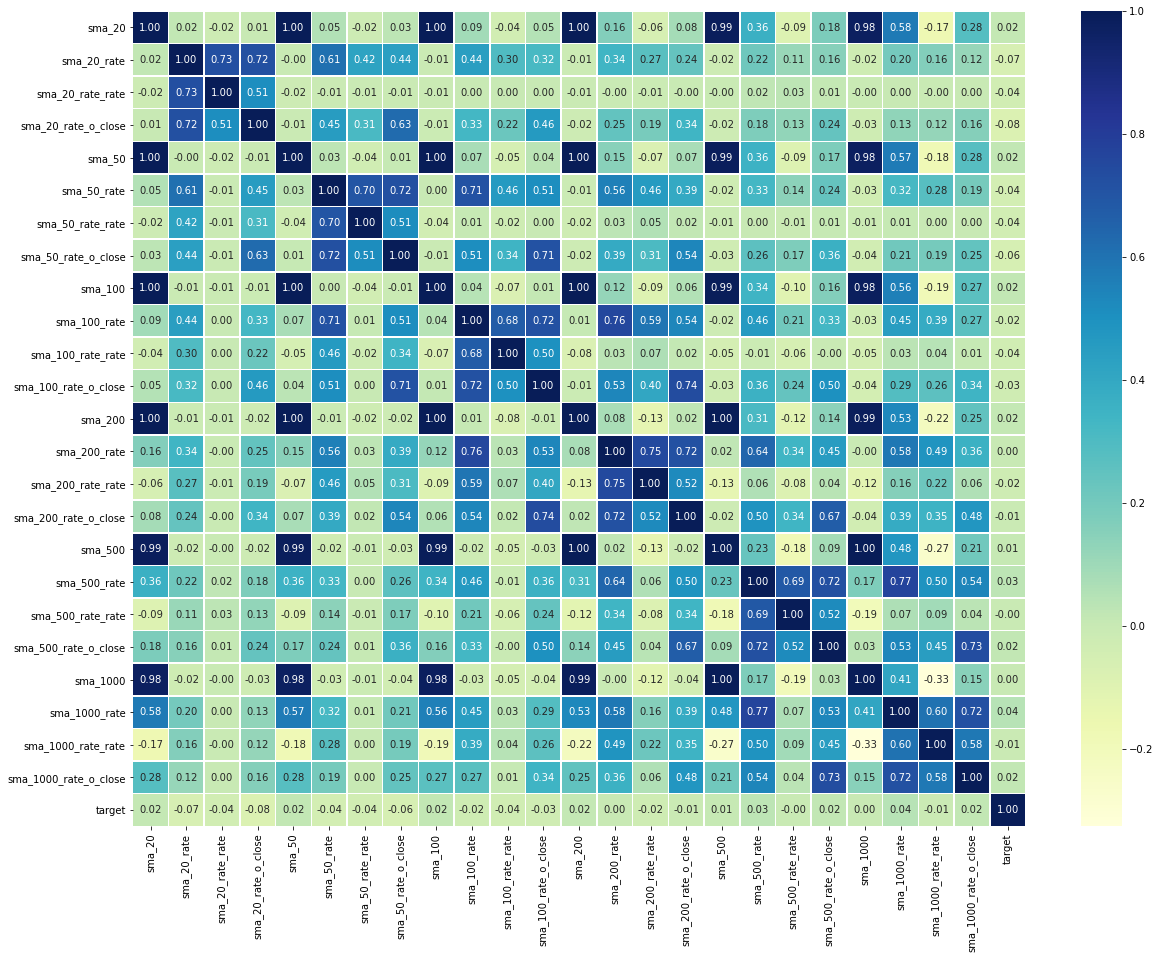

In [97]:
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [86]:
# df.to_csv("../data/BTCUSDT-hour-target-features.csv", index=False) #Default

In [89]:
d = df[-1000:]

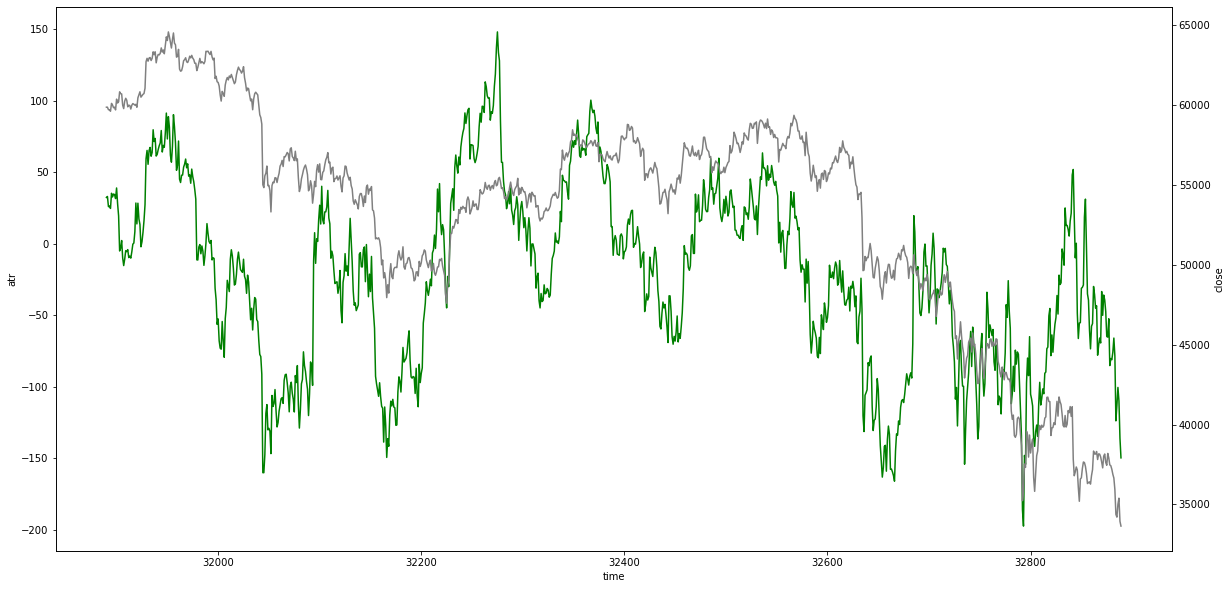

In [90]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.sma_50_rate,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

In [110]:
i = SMAIndicator(df.sma_500_o_close, window=1000)
df["sma_500_o_close_minus_1"] = list(map(lambda x: x-1, df.sma_1000_o_close))

In [111]:
d = df[["sma_500_o_close_minus_1", "target"]].copy()

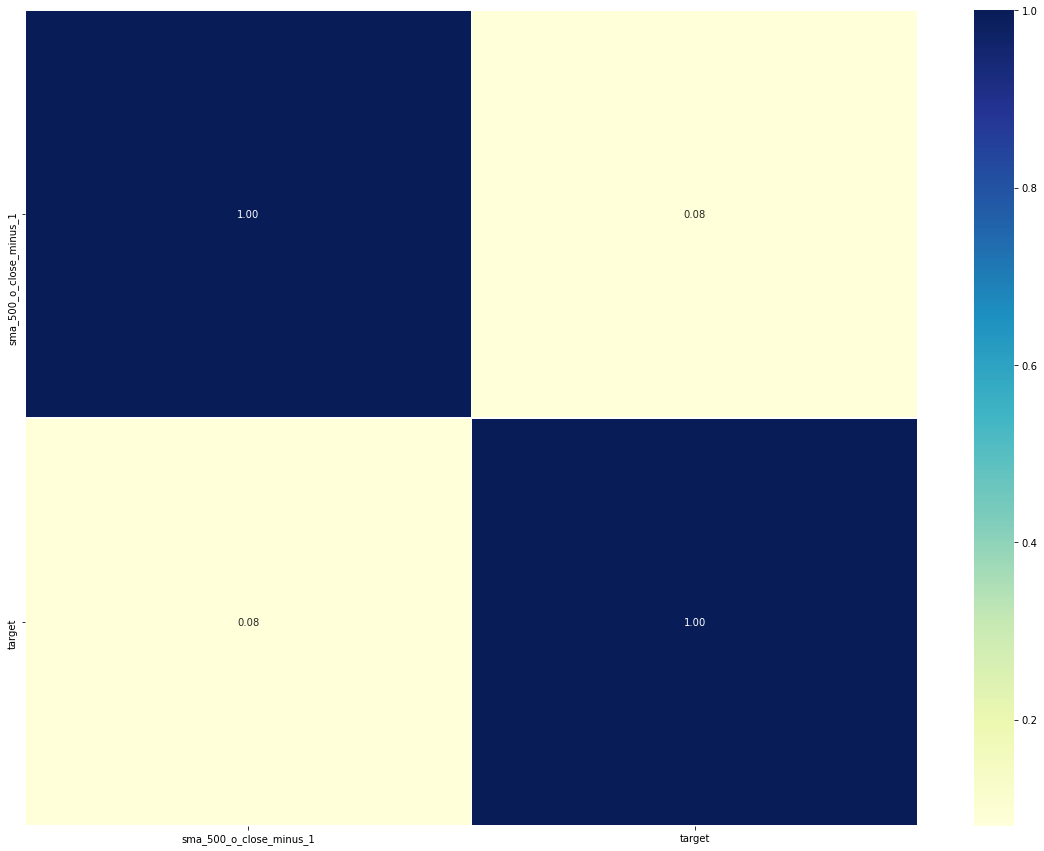

In [112]:
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")